In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import numpy as np 
import glob 
import warnings 
from scipy.stats import norm
from IPython.display import display, HTML
import scipy
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
sns.set()

In [2]:
epl_teams =['Manchester_City','Liverpool','Tottenham','Manchester_United','Arsenal',
            'Chelsea','Wolverhampton_Wanderers','Watford',
            'West_Ham','Everton','Leicester','Bournemouth',
           'Crystal_Palace','Newcastle_United','Brighton','Burnley',
           'Southampton','Cardiff','Fulham','Huddersfield']

In [5]:
data = []
driver = webdriver.Chrome(r"C:/chromedriver_win32/chromedriver.exe")
for i in epl_teams:
    
    driver.get('https://understat.com/team/'+i+'/2018')

    baseTable = driver.find_element_by_id('team-players')
    tableRows = baseTable.find_elements_by_tag_name('tr')
    print(i)
    for item in range(1,len(tableRows)):
        row = tableRows[item].find_elements_by_tag_name('td')
        Team = i
        name = row[1].text
        pos = row[2].text
        apps = row[3].text
        Min = row[4].text
        goals = row[5].text
        assists = row[6].text
        sh90 = row[7].text
        kp90 = row[8].text
        xg = row[9].text
        xa = row[10].text
        xg90 = row[11].text
        xa90 = row[12].text
        data.append([Team,name,pos,apps,Min,goals,assists,sh90,kp90,xg,xa,xg90,xa90])


    
df = pd.DataFrame(data)
df = df.rename(columns={0:'Team',1:"Name",2: "Position",3: "Apps", 4:"Min", 5:"Goals_Scored"
                , 6:"Assists",7: "Sh90",8: "KP90",9: "xG",10: "xA"
                , 11:"xG90",12: "xA90"})

Manchester_City
Liverpool
Tottenham
Manchester_United
Arsenal
Chelsea
Wolverhampton_Wanderers
Watford
West_Ham
Everton
Leicester
Bournemouth
Crystal_Palace
Newcastle_United
Brighton
Burnley
Southampton
Cardiff
Fulham
Huddersfield


In [6]:
df.head()

,Team,Name,Position,Apps,Min,Goals_Scored,Assists,Sh90,KP90,xG,xA,xG90,xA90
0,Manchester_City,Sergio Agüero,F,25,1879,18,6,4.41,1.20,17.10-0.90,3.78-2.22,0.82,0.18
1,Manchester_City,Raheem Sterling,F M,26,2093,12,8,2.24,2.24,11.25-0.75,9.12+1.12,0.48,0.39
2,Manchester_City,Leroy Sané,F,24,1506,8,9,2.51,2.03,6.00-2.00,6.91-2.09,0.36,0.41
3,Manchester_City,David Silva,M,25,1826,6,5,2.17,2.76,7.48+1.48,7.90+2.90,0.37,0.39
4,Manchester_City,Riyad Mahrez,F M,23,1062,6,2,3.73,1.44,6.21+0.21,2.51+0.51,0.53,0.21


In [47]:
df['Goals_Scored'] = pd.to_numeric(df['Goals_Scored'])
df['Sh90'] = pd.to_numeric(df['Sh90'])
df['Apps'] = pd.to_numeric(df['Apps'])

In [49]:
len(df.loc[21]['Name'])
df_teams = df[df.Name =='']

df_players = df[df.Name != '']

In [50]:


data = df_players[(df_players.Apps > 10) & (df_players['Position'].isin(['F', 'F M']))]

In [53]:
data[data.Sh90 > 6]

,Team,Name,Position,Apps,Min,Goals_Scored,Assists,Sh90,KP90,xG,xA,xG90,xA90


In [44]:
df_players['Position'].unique()

array(['F', 'F M', 'M', 'D', 'D M', 'GK', 'S', 'D F M'], dtype=object)

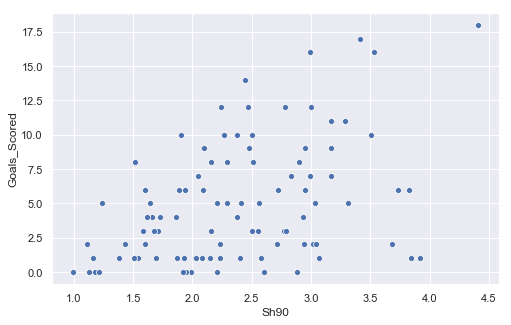

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x=data['Sh90'],y =data['Goals_Scored'])